## Lecture topic 5: 

## Ordinary and partial differential equations

## Part 2

In [1]:
from lecture_utils import *

### Topics of Part 2

1. Continuation with integrators 
    - Leapfrog
    - Verlet 
    
2. Partial differential equations

### Repetition: Leapfrog method


Scheme comparing RK2 and leapfrog (Figure adapted from "Computational Physics" by Marc Newman)

<img src="leapfrog.png" width="500"/>

- RK2:  
$$
 \begin {align}
 x\left(t+\frac{1}{2}h\right) &= x(t) + \frac{1}{2}hf(x(t),t)\\
   x(t+h) &= x(t) + hf\left(x\left(t+\frac{1}{2}h\right),t+\frac{1}{2}h\right)
 \end{align}
$$


- Leapfrog


\begin{align}
   x\left(t+h\right) &= x(t) + hf\left(x\left(t+\frac{1}{2}h\right),t+\frac{1}{2}h\right)\\
   x\left(t+\frac{3}{2}h\right) &= x\left(t+\frac{1}{2}h\right) + hf(x(t+h),t+h)\\
\end{align}



#### When/why would one use Leapfrog instead of RK?

- RK4 more accurate, but not time-reversal symmetric
- time-reversal symmetric behavior important for energy conservation
- energy conservation important for many problems in physics, for example:
  - nonlinear pendulum
  - planet orbiting a star
  - molecular dynamics (computer simulation of movement of atoms and molecules)

### Time reversal and energy conservation

- forward and backward solution should be identical
- forward means we have a positive interval $h$
- backwards means we have a negative interval $-h$



### Forward and backward calculation with Leapfrog

<img src="back_and_forward_calculation_leapfrog.png" width="400"/>

Equations for backward calculation ($h \rightarrow -h$):

$$
\begin{align}
   x\left(t-h\right) &= x(t) - hf\left(x\left(t-\frac{1}{2}h\right),t-\frac{1}{2}h\right)\\
   x\left(t-\frac{3}{2}h\right) &= x\left(t-\frac{1}{2}h\right) - hf(x(t-h),t-h)
\end{align}
$$

Let's now start the backward calculation from $t+\frac{3}{2}h$, i.e., $t\rightarrow t+\frac{3}{2}h$

$$
\begin{align}
   x\left(t+\frac{1}{2}h\right) &= x\left(t + \frac{3}{2}h\right) - hf(x\left(t+h),t+h\right)\\
   x(t) &= x(t+h) - hf\left(x\left(t+\frac{1}{2}h\right),t+\frac{1}{2}h\right)
\end{align}
$$

The Leapfrog method is time-reversal symmetric. Time reversal symmetry means that if start from a certain time and go backwards in time we can exactly retrace all steps of the forward solution. Let's start our backward calculation at $t + \frac{3}{2}h$ as shown in the figure. We perform the step between the midpoints from $t+\frac{3}{2}h$ to $t+\frac{1}{2}h$ and the step between the full integer points from $t+h$ to $t$. The same steps are performed in the forward algorithm, just reversed. The mathematical operations are the same, just reversed and the last two equations are identical to the forward equations on slide 3.

### Forward and backward calculation with RK2

<img src="back_and_forward_calculation_rk2.png" width="400"/>

Equations for backward calculation ($h \rightarrow -h$):

$$
 \begin {align}
   x\left(t-\frac{1}{2}h\right) &= x(t) - \frac{1}{2}hf(x,t)\\
   x(t-h) &= x(t) - hf\left(x\left(t-\frac{1}{2}h\right),t-\frac{1}{2}h\right)
 \end{align}
$$


Let's start the backward calculation from $t+h$, i.e., $t\rightarrow t+h$

$$
 \begin {align}
   x\left(t+\frac{1}{2}h\right) &= x(t+h) - \frac{1}{2}hf(x(t+h),t+h)\\
   x(t) &= x(t+h)- hf\left(x\left(t+\frac{1}{2}h\right),t+\frac{1}{2}h\right)
 \end{align}
$$



RK2 is not time-reversal. Let's start the backward calculation from $t+h$. We perform a midpoint step from $t+h$ to $t+\frac{1}{2}h$ and a full step form $t+h$ to $h$. However, in the forward algorithm we don't perform a midpoint step from $t+\frac{1}{2}h$ to $t+h$. It is easy to show that the last two equations are not identical to the RK2 forward equations on slide 3. 

### Example: Nonlinear pendulum



<img src="pendulum.png" width="200"/>

$$
\frac{\mathrm{d}^2\theta}{\mathrm{d}t^2} = - \frac{g}{l}\sin(\theta)
$$

Transformation into two first-order equations

$$
\begin{align}
 \frac{\mathrm{d}\theta}{\mathrm{d}t}  = \omega, \qquad
 \frac{\mathrm{d}\omega}{\mathrm{d}t} = - \frac{g}{l}\sin(\theta)
\end{align}
$$

The motion of the pendulum is time-reversal symmetric. The motion the pendulum makes in a single period, is exactly the same backwards as it is forwards. The length of the arm is 10 cm and m =1 kg. The potential energy of the pendulum is $V = mgl(1-\cos(\theta))$ and the kinetic energy is $T= 0.5ml^2(\mathrm{d}\theta/\mathrm{d}t)^2$.  



In [29]:
from numpy import sin, cos, pi, array, arange
from matplotlib import pyplot as plt

""""Definition of parameters and initial conditions"""
g = 9.81
l = 0.1        # Lenght of arm is 10 cm
a = 0.0        # start time
b = 10.0       # end time
h = 0.001      # time step

start_theta_degree = 10
start_theta =  pi*start_theta_degree/180

tpoints = arange(a,b,h)

"""Right-hand side of differential equations"""
def f(r):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*sin(theta)
    return array([ftheta,fomega],float)

""" Potential energy """
def V(theta):
    return g*l*(1-cos(theta))

""" Kinetic energy """
def T(omega):
    return 0.5*l*l*omega*omega
    

In [30]:
""" RK2 integration for pendulum """
def rk2_integration(tpoints,start_theta): 
    #Initial condition: r[0] = start_theta ;  and r[1] = omega = 0
    r = array([start_theta,0.0],float) 
    thetapoints = []
    Vpoints = []
    Tpoints = []
    Epoints =[]

    for t in tpoints:
        thetapoints.append(r[0]*180/pi)
        Vpoints.append(V(r[0]))
        Tpoints.append(T(r[1]))
        Epoints.append(V(r[0])+T(r[1]))
        k1 = h*f(r)
        k2 = h*f(r+0.5*k1)
        r += k2  
    return thetapoints, Epoints

""" Leapfrog integration for pendulum """
def leapfrog_integration(tpoints,start_theta):
    thetapoints = []
    Vpoints = []
    Tpoints = []
    Epoints =[]

    r1 = array([start_theta,0.0],float) # Initial value for point 1
    r2 = r1 + 0.5*h*f(r1)               # Initial value for point 2 = midpoint

    for t in tpoints:
        thetapoints.append(r1[0]*180/pi)
        Vpoints.append(V(r1[0]))
        Tpoints.append(T(r1[1]))
        Epoints.append(V(r1[0])+T(r1[1]))
        r1 += h*f(r2)
        r2 += h*f(r1)
    return thetapoints, Epoints

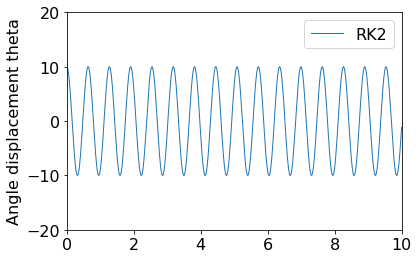

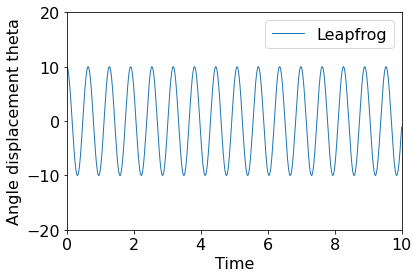

In [31]:
"""Solve problem with RK2"""
thetapointsRK2,EpointsRK2 = rk2_integration(tpoints,start_theta)

"""Solve problem with Leapfrog"""
thetapointsLF,EpointsLF = leapfrog_integration(tpoints,start_theta)

"""Plot theta with respect to time"""
plt.rc('font', size=16)

xstart = a
xend = b

plt.figure(1)
plt.xlim(xstart,xend)
plt.ylim(-start_theta_degree-10,start_theta_degree+10)
#plt.ylim(-200,200)
plt.ylabel('Angle displacement theta')
plt.plot(tpoints,thetapointsRK2,label='RK2',linewidth=1.0)
plt.legend()
plt.figure(2)
plt.xlim(xstart,xend)
plt.ylim(-start_theta_degree-10,start_theta_degree+10)
plt.ylabel('Angle displacement theta')
plt.xlabel('Time')
plt.plot(tpoints,thetapointsLF,label='Leapfrog',linewidth=1.0)
plt.legend()
plt.show()


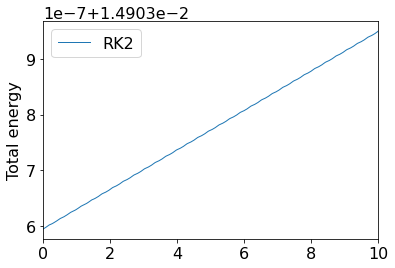

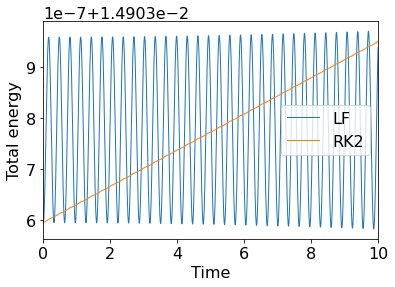

In [32]:
"""Plot total energy with respect to time"""
plt.rc('font', size=16)

xstart = a
xend = b

plt.figure(1)
plt.xlim(xstart,xend)
plt.ylabel('Total energy')
plt.plot(tpoints,EpointsRK2,label='RK2',linewidth=1.0)
plt.legend()
plt.figure(2)
plt.xlim(xstart,xend)
plt.ylabel('Total energy')
plt.xlabel('Time')
plt.plot(tpoints,EpointsLF,label='LF',linewidth=1.0)
plt.plot(tpoints,EpointsRK2,label='RK2',linewidth=1.0)
plt.legend()
plt.show()

Now the settings are $t_{end}=b =10$s and $h = 0.001$. Try the following things
-  decrease $h$ by an order of magnitude 
-  set $h$ to 0.01 and $b$ to 4000s. 

Especially the last point gives some interesting insights. Watch the videos to get some more explanations.

The solution with our numerical solvers is only approximate, which means the total energy of the system is only approximately constant. With RK2 we see clearly a drift in the energy. The leapfrog algorithm conserves energy at the end of a full swing of the pendulum, i.e., at the beginning and the end of the swing the energy will be the same.The energy fluctuates during the course of the swing though, i.e., it is not conserved during fractions of a period. However, at the end of the swing, it will return to the correct value. The leapfrog method is thus useful for solving the equations of motion of energy conserving physical systems. If we wait long enough with RK2, the energy will drift, also with RK4, i.e., the pendulum might stop swinging or the planet might fall out of orbit into the star. 

### Verlet method

- specialized method to solve ODEs of the form

\begin{align}
 \frac{\mathrm{d}^2x}{\mathrm{d}t^2} = f(x,t)
\end{align}

- most important example: Newton's equation of motion

\begin{equation}
 \frac{\mathrm{d}^2\mathbf{r}_i}{\mathrm{d}t^2} = \frac{\mathbf{F}_i}{m_i}
\end{equation}

- Verlet is a variant of Leapfrog method

In the case of molecular dynamics (MD), the force on atom $i$ will depend on the positions of all other atoms in the system. The interaction potentials are also in the case of classical MD non-linear functions of $\mathbf{r}$. In the case of ab initio MD the forces are obtained from quantum mechanics, i.e., the corresponding equations of motion must be always solved numerically. 

### Derivation of Verlet method

We transform

\begin{align}
 \frac{\mathrm{d}^2x}{\mathrm{d}t^2} = f(x,t)
\end{align}

to 2 first-order differential equations

\begin{equation}
 \frac{\mathrm{d}x}{\mathrm{d}t} = v, \qquad \frac{\mathrm{d}v}{\mathrm{d}t} = f(x,t)
\end{equation}



Using Leapfrog we would define a vector $\mathbf{r} = (x,v)$ and combine the two equations to a single vector equation

\begin{equation}
 \frac{\mathrm{d}\mathbf{r}}{\mathrm{d}t} = \mathbf{f}(\mathbf{r},t)
\end{equation}

With Leapfrog, the explicit expression to solve for $\mathbf{r}$ are

- Full step

\begin{align}
 x(t+h) &= x(t) + hv\left(t+\frac{1}{2}h\right)\\
 v(t+h) &= v(t) + h f\left(x\left(t+\frac{1}{2}h\right),t+\frac{1}{2}h\right)
\end{align}

- Midpoint step
\begin{align}
  x\left(t+\frac{3}{2}h\right) &= x\left(t+\frac{1}{2}h\right) + hv(t+h)\\
  v\left(t+\frac{3}{2}h\right) &= v\left(t+\frac{1}{2}h\right) + hf(x(t+h),t+h)
\end{align}


We can derive a full solution to the problem by only using

\begin{align}
  x(t+h) &= x(t) + hv\left(t+\frac{1}{2}h\right)\\
  v\left(t+\frac{3}{2}h\right) &= v\left(t+\frac{1}{2}h\right) + hf(x(t+h),t+h)
\end{align}

The initial value for $v\left(t+\frac{1}{2}h\right)$ can be obtained from Euler's method with a step size of $\frac{1}{2}h$

\begin{equation}
 v\left(t + \frac{1}{2}h\right) = v(t) + \frac{1}{2}hf(x(t),t)
\end{equation}


We never need to calculate $v$ at any integer point or $x$ at half integers. This is an improvement over leapfrog where we would solve all four equations, i.e., we have to do only half the work compared to leapfrog. 
This simplification only works for differential equations that have the specific form  $ \frac{\mathrm{d}^2x}{\mathrm{d}t^2} = f(x,t)$. For these type of ODEs, the right-hand side of the first equation ($ \frac{\mathrm{d}x}{\mathrm{d}t} =v$) depends on $v$, but not on $x$. The right-hand side of the second equation ($\frac{\mathrm{d}v}{\mathrm{d}t} = f(x,t)$) depends on $x$, but not on $v$. However, solving the equations of motion are ODEs of this form and they are a pretty common problem in physics. 

There is a small problem so far: We know $v$ at half-integer points and $x$ at full integer points, i.e., we never know both quantities at the same time. This is problematic if we want to calculate the potential, kinetic and total energy of the system because then we have to know $x$ and $v$ at the same time.

To make sure that we know also know $v$ at the integer points, we perform an additional half step. Let's assume we would know $v(t+h)$ then could perform a half-step with step size $-\frac{1}{2}h$ using Euler's method

\begin{equation}
 v\left(t+\frac{1}{2}h\right) = v(t+h) - \frac{1}{2}hf(x(t+h),t+h)
\end{equation}

Rearranging yields:
\begin{equation}
 v(t+h) = v\left(t+\frac{1}{2}h\right) + \frac{1}{2}hf(x(t+h),t+h)
\end{equation}



In combination with the equations on the previous slide, this give us the Verlet method.

### Working equations for the Verlet algorithm

Start:

\begin{equation}
 v\left(t + \frac{1}{2}h\right) = v(t) + \frac{1}{2}hf(x(t),t)
\end{equation}

Then iterate:

\begin{align}
 x(t+h) &= x(t) + hv\left(t+\frac{1}{2}h\right)\\
      k &= hf(x(t+h),t+h)\\
 v(t+h) &= v\left(t+\frac{1}{2}h\right) + \frac{1}{2}k\\
v\left(t+\frac{3}{2}h\right) &=  v\left(t+\frac{1}{2}h\right) + k
\end{align}

We are given initial values of $x$ and $v$ at some time $t$. We start by calculating the $v$ at the $t+\frac{1}{2}h$.  The subsequent values of $x$ and $v$ are then derived by applying the set of equations above. 

### Verlet working equations for simultaneous differential equations

Let's assume we have an equation of the form

\begin{align}
 \frac{\mathrm{d}^2\mathbf{r}}{\mathrm{d}t^2} = \mathbf{f}(\mathbf{r},t)
\end{align}

wher $\mathbf{r}=(x,y,...)$ is a vector. The Verlet working equations then transform to

Start:

\begin{equation}
 \mathbf{v}\left(t + \frac{1}{2}h\right) = \mathbf{v}(t) + \frac{1}{2}h\mathbf{f}(\mathbf{r}(t),t)
\end{equation}

Iterate:

\begin{align}
 \mathbf{r}(t+h) &= \mathbf{r}(t) + h\mathbf{v}\left(t+\frac{1}{2}h\right)\\
 \mathbf{k} &= h\mathbf{f}(\mathbf{r}(t+h),t+h)\\
 \mathbf{v}(t+h) &= \mathbf{v}\left(t+\frac{1}{2}h\right) + \frac{1}{2}\mathbf{k}\\
 \mathbf{v}\left(t+\frac{3}{2}h\right) &=  \mathbf{v}\left(t+\frac{1}{2}h\right) + \mathbf{k}
\end{align}

When solving equations of motion, we usually have simulateneous second-order differential equations with position vector $\mathbf{r}=(x,y,z)$, i.e., three simultaneous second-order differential equations, which can be transformed to 6 simulatenous first-order equations. If we want to solve the equation of motions for $n$ interacting particles, we have $6n$ simulatenous euqations to solve. 

There are different flavors of the Verlet method. What we have discussed here is often called the <b>Velocity Verlet</b> algorithm. 

### Error propagation with the (Velocity) Verlet method 

- Verlet conserves, since it is a variant of leapfrog, also the energy
- error for single step is $\mathcal{O}(n^3)$ 
- accumulated error is $\mathcal{O}(n^2)$

 ### Error propagation with the Verlet method 
 
 <b>Example:</b> Earth (blue) +  moon (gray) orbiting around sun (yellow)

- Equations of motion solved by the (Velocity) Verlet method
- yields right behavior
- <i>Video by Miguel Caro (Advanced Statistical Physics course at Aalto), see also   https://youtu.be/KQAP90SWtiQ</i>

In [128]:
play_VelocityVerlet()

### Summary: Methods for solving ODEs and error

| method | single step error | accumulated error |
| --- | --- | --- |
| Euler | $\mathcal{O}(n^2)$ | $\mathcal{O}(n)$ |
| RK2   | $\mathcal{O}(n^3)$ | $\mathcal{O}(n^2)$ |
| RK4        | $\mathcal{O}(n^5)$ | $\mathcal{O}(n^4)$ |
| Leapfrog   | $\mathcal{O}(n^3)$ | $\mathcal{O}(n^2)$ |
| (Velocity) Verlet   | $\mathcal{O}(n^3)$ | $\mathcal{O}(n^2)$ |

Leapfrog and Velocity Verlet are in addition time-reversal symmetric and conserve, e.g., energy.

<b>Lesson learned:</b> it is important to choose a sensible integration scheme for the ODEs together with a proper step size




## Partial differential equations


Many problems in physics are partial differential equations, e.g.,

- Laplace and Poisson equations
- Maxwell's equations
- Schrödinger equation
- wave equation
- diffusion equation

$\rightarrow$ solving them is usually computationally more demanding than the ODE case

### Types of problems

1. boundary problems
2. initial value problems

- $\rightarrow$ initial value problems are typically harder to solve for partial differential equations
- we will learn one method for each

For ODEs we discussed only initial value problems, meaning that we are solving differential equations given the initial values of the variables. This is the most common from for differential equations in physics. However, there are also boundary value problems. 

For instance, let's consider the example of a ball thrown into the air. We could specify two initial conditions:  the height of the ball at $t=0$ and its initial upward velocity. Another possibilty is to formulate this example as boundary value problem. We could specify our two conditions as initial and end condition instead. We could specify that the ball has the height $x(t=0)=0$ and $x(t_1)=0$, where $t_1$ is a later time, i.e., we specify the time when the ball is thrown and when it lands.

Initial value problems are generally easier to solve for ODEs. For partial differential equations, the opposite is true.

### Relaxation method for boundary value problems

<img src="laplace1.png" width="300"/>
(Figure from "Computational Physics" by Marc Newman

To introduce the method we will look at a simple electrostatics problem: an empty box, which as conducting wall, all of which are grounded to 0 V except for the wall at the top, which is at some other voltage $V$. The (very) small gaps between the top wall and the others are intended to show that they are insulated from one another.

<b>Goal:</b> determine value of the electrostatic potential at points within the box

This also a boundary value problem: we want to describe the behavior of a variable in space and we are given some constraints on the variable around that space.

We can find the electrostatic potential $\phi$ inside the box by solving the 2D Laplace equation

\begin{equation}
 \frac{\partial^2\phi}{\partial x^2} + \frac{\partial^2\phi}{\partial y^2} = 0
\end{equation}

with the boundary conditions that $\phi =V$ on the top wall and $\phi =0$ on the other walls.

<b>Procedure:</b>
  - use method of finite difference to express the second derivatives of $\phi$ 
      $\rightarrow$ see lecture topic 2    
  - use relaxation method to solve the obtained set of linear simultaneous equations
      $\rightarrow$ see lecture topic 3
    

### Repetition: Finite differences for second derivatives

We calculate the first derivates first using the central difference method for derivatives at $x+h/2$ and $x-h/2$.

\begin{equation}
 f'(x+h/2) \approx \frac{f(x+h)-f(x)}{h} \qquad f'(x-h/2) \approx \frac{f(x)-f(x-h)}{h}
\end{equation}

Now we applyt the central difference method again for the second derivative

\begin{align}
 f'' &\approx  \frac{f'(x+h/2)-f'(x-h/2)}{h}\\
     & = \frac{f(x+h)-2f(x)+f(x-h)}{h^2}
\end{align}

### Apply the finite difference method to the Laplace equation

<img src="laplace_grid.png" width="300"/>
(Figure from "Computational Physics" by Marc Newman

- divide the space in the box into grid points with spacing $a$ as shown in the figure. 
- put points also on interior and boundaries of that space

Calculate now 2nd derivatives:

\begin{align}
 \frac{\partial^2\phi}{\partial x^2} &=\frac{\phi(x+a,y) + \phi(x-a,y) -2\phi(x,y)}{a^2}\\
 \frac{\partial^2\phi}{\partial y^2} &=\frac{\phi(x,y+a) + \phi(x,y-a) -2\phi(x,y)}{a^2}
\end{align}

The Laplace equation in 2D is now:

\begin{equation}
\frac{\partial^2\phi}{\partial x^2} +  \frac{\partial^2\phi}{\partial y^2} = \frac{\phi(x+a,y) + \phi(x-a,y) +\phi(x,y+a) + \phi(x,y-a)-4\phi(x,y)}{a^2} = 0
\end{equation}


We basically add the values of $\phi$ at all the grid points adjacent to $(x,y)$ and subtract 4x the value at $(x,y)$ and then divide by $a^2$.

We need to solve

\begin{equation}
 \phi(x+a,y) + \phi(x-a,y) +\phi(x,y+a) + \phi(x,y-a)-4\phi(x,y) = 0
\end{equation}

- we have one equation like this for every grid point $(x,y)$
- the solution to the entire set gives us $\phi(x,y)$ at every grid point

$\rightarrow$ large set of linear simultaneous equations

$\rightarrow$ method of choice is here the relaxation method (lecture topic 3)

This linear set of equations could be solved, in principle, with Gaussian elimination or LU decomposition. In this case, using the relaxation method is a better choice because it is computationally cheaper. We introduced the relaxation method for non-linear equations, but they -of course- also be applied to linear equations.

### Application of the relaxation method to our electrostatics problem

Let's first rearrange

\begin{equation}
\phi(x,y) =\frac{1}{4} (\phi(x+a,y) + \phi(x-a,y) +\phi(x,y+a) + \phi(x,y-a)) 
\end{equation}

<b>Procedure:</b>
- fix $\phi(x,y)$ at the boundaries of the system 
- guess some initial values for $\phi(x,y)$, can be bad, doesn't matter
- calculate new values $\phi'$ we the guessed initial values
- repeat until convergence reached

$\rightarrow$ this is also known as <b> Jacobi method </b>

### Solution of the 2D Laplace equation

Let's now solve our electrostatics problem with the Jacobi method assuming that the box is 1 m long each side, $V =  1$ volt and the grid spacing $a = 1cm$. We hve 100 grid points or 101 if we count the points at both beginning and end. 

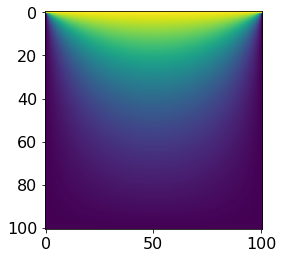

In [129]:
from numpy import empty,zeros,max
from matplotlib import pyplot as plt

#Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-6   # Target accuracy

# Create arrays to hold potential values
phi = zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = empty([M+1,M+1],float)

# Main loop
delta = 1.0
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4
    
    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi
    # Alternative to swapping
    #phi  = phiprime
    #phiprime = empty([M+1,M+1],float)
    
# Make a plot
plt.imshow(phi)


The produced figure shows that there is a region of high electric potential around the top wall of the box, as expected, and low  potential aroudn the other three walls. Note that the program will run for a while.

A few notes about the program:
- if point $i,j$ at boundary, then set to start values; the values at the boundaries never change
- if points $i,j$ not at boundary, calculate $\phi'$

### Things to note about the Jacobi method

<b>Accuracy:</b>
- only approximate since we use finite differences for derivatives
- small target accuracy won't fix this
- higher-order derivative approximation necessary to improve accuracy

<b>Accessible points </b>
- the calculation give the value of $\phi$ only at the grid points and not elsewhere
- in between values: interpolation schemes possible

<b> Division of space </b>
- boundaries around space may not always be square
- can be difficult to divide space with square grid $\rightarrow$ grid points don't fall on boundaries


### Other, faster methods for boundary value problems

- overrelaxation 
- Gauss-Seidel method

### Initial value problems

- starting point of variable known
- goal: prediction of future variation as function of time

<b>Example: </b> Diffusion equation
\begin{equation}
    \frac{\partial \phi}{\partial t} = D\frac{\partial^2\phi}{\partial x^2}
\end{equation}

- use space-time grid? 🤔 
- we have boundary conditions in the spatial dimension ($x$), but not in time dimension
$\rightarrow$ relaxation method breaks down because we don't know what value to use for time-like end of the grid

We have now (compared to the 2D Laplace equation), the independent variables $x$ and $t$, instead of $x$ and $y$ One might think that we can proceed as before and create a space-time grid, then write the derivatives in finite difference form and get a set of simultaneous equations that can be solved by the relaxation method. This doesn't work because we have only boundary conditions in the spatial direction $x$. For the time dimension we have an initial conditions. We know where the value starts, but not where it ends. The relaxation method breaks thus down because we don't know what value of $\phi$ to use for time-like end of the grid.

### FTCS method

- short for forward-time centered-space method
- method to solve initial value problems for partial differential equations

<b>Procedure:</b>
 - divide spatial dimension $x$ into a grid of points with spacing $a$
 - calculate second derivative with respect to $x$ with finite differences
   $\rightarrow$ simultaneous ordinary differential equations are obtained
 - use the Euler method to solve them

For the ODEs we arrived at the conclusion that we shouldn't use Euler's method due to the poor accuracy. Why do we use it here? Estimating the second derivative with finite differences is not very accurate. There is no point in using a very accurate solver. Euler's method gives errros which are comparable to the error introduced by the finite difference approach. 

### Example: diffusion equation

\begin{equation}
    \frac{\partial \phi}{\partial t} = D\frac{\partial^2\phi}{\partial x^2}
\end{equation}

Take second derivatives with finite differences

\begin{align}
 \frac{\partial^2\phi}{\partial x^2} =\frac{\phi(x+a,y) + \phi(x-a,y) -2\phi(x,y)}{a^2}
\end{align}

and insert in diffusion equation

\begin{equation}
    \frac{\partial \phi}{\partial t} = \frac{D}{a^2}\left[\phi(x+a,y) + \phi(x-a,y) -2\phi(x,y)\right]
\end{equation}


We can think of the value of $\phi$ at the different grid points as separate variables 
$\rightarrow$ we have a set of simultaneous ODEs now.

We have the ODE

\begin{equation}
 \frac{\mathrm{d}\phi}{\mathrm{d}t} = f(\phi,t)
\end{equation}

where $f(\phi,t)$ is the right-hand side of the last equation. Solving with Euler yields

\begin{equation}
 \phi(x,t+h) = \phi(x,t) + h\frac{D}{a^2}\left[\phi(x+a,y) + \phi(x-a,y) -2\phi(x,y)\right]
\end{equation}

If we know $\phi$ at every grid pint $x$ hat some time $t$, then we get from this equation the value of each grid point at time $t+h$.

#### Example: Solving the heat equation with FTCS

<img src="water_container.png" width="300"/>

We have a steel container, which is 1 cm thick and is initially at a uniform temperature of 20 degree Celsius everywhere. The container is placed in a bath of cold water at 0 degree celsius and filled with hot water at 50 degree Celsius. 

Assumptions: container is arbitrarily wide. Neither cold not hot water change temperature. 

We have to solve the 1D diffusion equation for the temperature $T$

\begin{equation}
 \frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2}
\end{equation}

The $x$-axis is divided into 100 equal points (101 in total counting boundaries). The first and last point have fixes temperatures at 50 degree Celsius and 0 degree Celsius, respectively. Intermediate points are initially at 20 degree Celsius. The diffusion coefficient is $D =  4.25\times10^{-6}\text{m}^2\text{s}^{-1}$.

Task: Plot of temperatures profile at times $t = 0.01, 0.1, 0.4, 1, 10$ s. 

0.5903024673461914


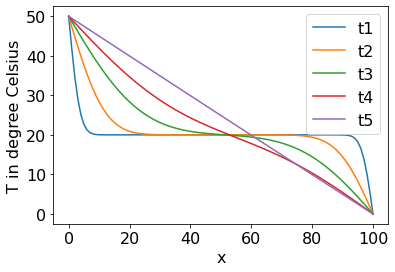

In [133]:
from numpy import empty
from matplotlib import pyplot as plt 
import time


# Constants
L = 0.01      # Thickness of steel in meters
D = 4.25e-6   # Thermal diffusivity
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-4      # Time-step
epsilon = h/1000

Tlo = 0.0     # Low temperature in Celcius
Tmid = 20.0   # Intermediate temperature in Celcius
Thi = 50.0    # Hi temperature in Celcius

t1 = 0.01
t2 = 0.1
t3 = 0.4
t4 = 1.0
t5 = 10.0
tend = t5 + epsilon

# Create arrays
T = empty(N+1,float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid
Tp = empty(N+1,float)
Tp[0] = Thi
Tp[N] = Tlo

# Main loop
t = 0.0
c = h*D/(a*a)

start = time.time()
while t<tend:

    # Calculate the new values of T
    
    #for i in range(1,N):  ## Loop is the slow alternative
    #    Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i]) 
    
    Tp[1:N] = T[1:N] + c* (T[2:N+1]+T[0:N-1]-2*T[1:N])
    T,Tp = Tp,T
    t += h

    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plt.plot(T,label='t1')
    if abs(t-t2)<epsilon:
        plt.plot(T,label='t2')
    if abs(t-t3)<epsilon:
        plt.plot(T,label='t3')
    if abs(t-t4)<epsilon:
        plt.plot(T,label='t4')
    if abs(t-t5)<epsilon:
        plt.plot(T,label='t5')

end = time.time()
print(end - start)
plt.xlabel("x")
plt.ylabel("T in degree Celsius")
plt.legend()


The temperatue profile starts off with a large region of the system at 20 degree Celsius and a much smaller region of hotter and colder temperatures. The profile becomes smoother over time, til we have a straight line in the end.

<b>Comments:</b>
- do not compare directly `t == t1`. They could be unequal due to numerical rounding errors; calculating the absolut value of the difference is better

- use arrays instead of loop to calculate Tp; it's faster.

### Application of FTCS to wave equation

The 1D wave equation is

\begin{equation}
 \frac{\partial^2\phi}{\partial x^2} - \frac{1}{v^2}\frac{\partial^2\phi}{\partial t^2} =0
\end{equation}

Your task in exercise 5.6 is to apply the FTCS method to the wave equation.This is an interesting case considering numercial stability. 

### Numerical stability of FTCS

- von Neumann stability analysis yields for the diffusion equation that the solution will be stable if

\begin{equation}
 h\leq \frac{a^2}{2D}
\end{equation}

- for the wave equation there exists no such expression. 
